# Brest Cancer Prevention Using K-Means

### Part a)

In [1]:
import numpy as np
import pandas as pd
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import warnings

In [2]:
class KMeans:
    def __init__(self, n_clusters, tol=0.00001, max_iter=3000):
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, X, mu=np.array([]), log=False):
        if mu.shape[0] != self.n_clusters:
            warnings.warn("Shape of given centroids does not match n_clusters\n Skipping the fit step")
            return
        else:
            self.centroids = mu

        self.C = np.zeros(len(X))

        for iteration in range(self.max_iter):

            if log:
                print(f"Iteration {iteration+1} / {self.max_iter}:")
                print()
                for i, centroid in enumerate(self.centroids):
                    print(f"\tChosen Centroid for cluster {i+1}:")
                    print("\t", end="")
                    print([f"{num:.4f}" for num in centroid])
                    print()
                print()

            for i, row in enumerate(X):
                distances = [np.linalg.norm(row - c) for c in self.centroids]
                self.C[i] = np.argmin(distances)

            prev_centroids = np.copy(self.centroids)

            for i in range(self.n_clusters):
                points = [X[j] for j in range(len(X)) if self.C[j] == i]
                if len(points) > 0:
                    self.centroids[i] = np.mean(points, axis=0)

            if np.linalg.norm(self.centroids - prev_centroids) < self.tol:
                if log:
                    print("Skipping the fit proccess due to tolorace flag")
                break

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - self.centroids[i], axis=1) for i in range(self.n_clusters)]).T
        classification = np.argmin(distances, axis=1)
        return  classification.reshape(-1,1)

    def accuracy(self, y_true, y_pred):
        correct_predictions = np.sum(y_true == y_pred)
        total_predictions = len(y_true)
        accuracy = (correct_predictions / total_predictions)
        return max([accuracy, 1-accuracy])

    def sse(self, X):
        sse = 0
        for i, x in enumerate(X):
            centroid = self.centroids[int(self.C[i])]
            sse += np.linalg.norm(x - centroid) ** 2
        return sse

In [3]:
X = pd.read_csv("./breast_data.csv", names=[f"feature_{i+1}" for i in range(30)])
y = pd.read_csv("./breast_labels.csv", names=["label"])

print(X.shape)
print()
print(y.shape)

(569, 30)

(569, 1)


In [4]:
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y.head()

,label
0,1
1,1
2,1
3,1
4,1


In [6]:
km = KMeans(n_clusters=2)

initial_mu = X.sample(2, random_state=42).to_numpy()

km.fit(X.to_numpy(), mu=initial_mu, log=True)

predicts = km.predict(X.to_numpy())

print(f"Accuracy of implemented K-mean: {km.accuracy(y.to_numpy(), predicts)*100:.2f}%")

Iteration 1 / 3000:

	Chosen Centroid for cluster 1:
	['12.4700', '18.6000', '81.0900', '481.9000', '0.0997', '0.1058', '0.0800', '0.0382', '0.1925', '0.0637', '0.3961', '1.0440', '2.4970', '30.2900', '0.0070', '0.0191', '0.0270', '0.0104', '0.0178', '0.0036', '14.9700', '24.6400', '96.0500', '677.9000', '0.1426', '0.2378', '0.2671', '0.1015', '0.3014', '0.0875']

	Chosen Centroid for cluster 2:
	['18.9400', '21.3100', '123.6000', '1130.0000', '0.0901', '0.1029', '0.1080', '0.0795', '0.1582', '0.0546', '0.7888', '0.7975', '5.4860', '96.0500', '0.0044', '0.0165', '0.0227', '0.0137', '0.0139', '0.0017', '24.8600', '26.5800', '165.9000', '1866.0000', '0.1193', '0.2336', '0.2687', '0.1789', '0.2551', '0.0659']


Iteration 2 / 3000:

	Chosen Centroid for cluster 1:
	['12.6366', '18.6206', '81.6986', '503.2074', '0.0950', '0.0923', '0.0644', '0.0345', '0.1785', '0.0634', '0.3103', '1.2130', '2.1955', '24.6285', '0.0072', '0.0236', '0.0289', '0.0107', '0.0206', '0.0037', '14.1762', '24.8002',

### Part b)

In [7]:
km = KMeans(n_clusters=2)

for i in range(5):
    seed = 42 + (i*5)

    initial_mu = X.sample(2, random_state=seed).to_numpy()

    km.fit(X.to_numpy(), mu=initial_mu)

    predicts = km.predict(X.to_numpy())

    print(f"Accuracy of implemented K-mean on starting set #{i+1}: {km.accuracy(y.to_numpy(), predicts)*100:.2f}%")
    print()
    

Accuracy of implemented K-mean on starting set #1: 85.41%

Accuracy of implemented K-mean on starting set #2: 85.41%

Accuracy of implemented K-mean on starting set #3: 85.41%

Accuracy of implemented K-mean on starting set #4: 85.41%

Accuracy of implemented K-mean on starting set #5: 85.41%



### Part c)

In [8]:
initial_mu = np.array(scipy.io.loadmat("./init_mu.mat")["mu_init"]).T

km = KMeans(n_clusters=2)

km.fit(X.to_numpy(), initial_mu)

km.predict(X.to_numpy())

predicts = km.predict(X.to_numpy())

print(f"Accuracy of implemented K-mean on providied centroids: {km.accuracy(y.to_numpy(), predicts)*100:.2f}%")

Accuracy of implemented K-mean on providied centroids: 85.41%


### Part e)

In [9]:
for n_components in range(1, X.shape[1] + 1):

    # Reducing the size of features using PCA
    pca = PCA(n_components=n_components)
    
    pca.fit(X)

    X_reduced = pca.transform(X)

    np.random.seed(42)

    initial_mu = X_reduced[np.random.choice(X_reduced.shape[0], size=2, replace=False)]

    print(f"Shape of data: {X_reduced.shape} | Shape of Initial MU: {initial_mu.shape}")

        
    km = KMeans(n_clusters=2)

    km.fit(X_reduced, initial_mu)

    predicts = km.predict(X_reduced)

    if n_components == 2:
        X_2d = X_reduced.copy()
        initial_mu_2d = initial_mu.copy()
        predicts_2d = predicts.copy()
        
    print(f"Accuracy of K-means with {n_components} of {X.shape[1]} features  : {km.accuracy(y_true=y.to_numpy(), y_pred=predicts)*100:.2f}%")
    print()


Shape of data: (569, 1) | Shape of Initial MU: (2, 1)
Accuracy of K-means with 1 of 30 features  : 85.41%

Shape of data: (569, 2) | Shape of Initial MU: (2, 2)
Accuracy of K-means with 2 of 30 features  : 85.41%

Shape of data: (569, 3) | Shape of Initial MU: (2, 3)
Accuracy of K-means with 3 of 30 features  : 85.41%

Shape of data: (569, 4) | Shape of Initial MU: (2, 4)
Accuracy of K-means with 4 of 30 features  : 85.41%

Shape of data: (569, 5) | Shape of Initial MU: (2, 5)
Accuracy of K-means with 5 of 30 features  : 85.41%

Shape of data: (569, 6) | Shape of Initial MU: (2, 6)
Accuracy of K-means with 6 of 30 features  : 85.41%

Shape of data: (569, 7) | Shape of Initial MU: (2, 7)
Accuracy of K-means with 7 of 30 features  : 85.41%

Shape of data: (569, 8) | Shape of Initial MU: (2, 8)
Accuracy of K-means with 8 of 30 features  : 85.41%

Shape of data: (569, 9) | Shape of Initial MU: (2, 9)
Accuracy of K-means with 9 of 30 features  : 85.41%

Shape of data: (569, 10) | Shape of I

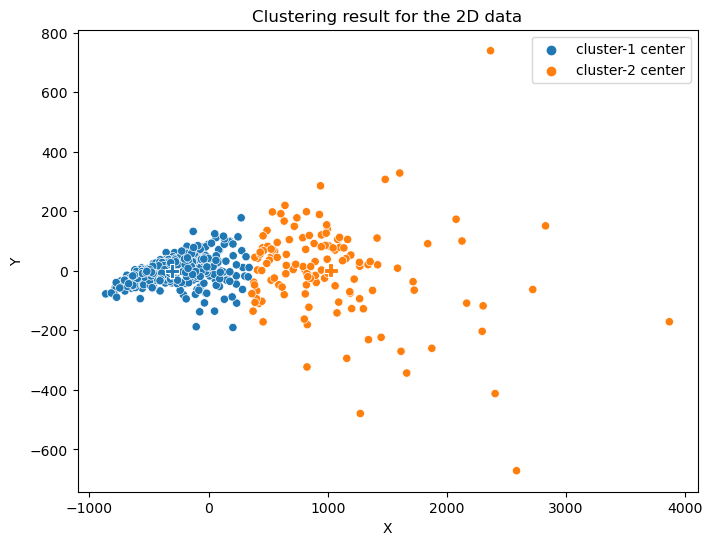

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=predicts_2d.flatten(), legend=False)
sns.scatterplot(x=initial_mu_2d[:,0], y=initial_mu_2d[:,1], hue=["cluster-1 center","cluster-2 center"], marker="P", s=100)
plt.title('Clustering result for the 2D data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

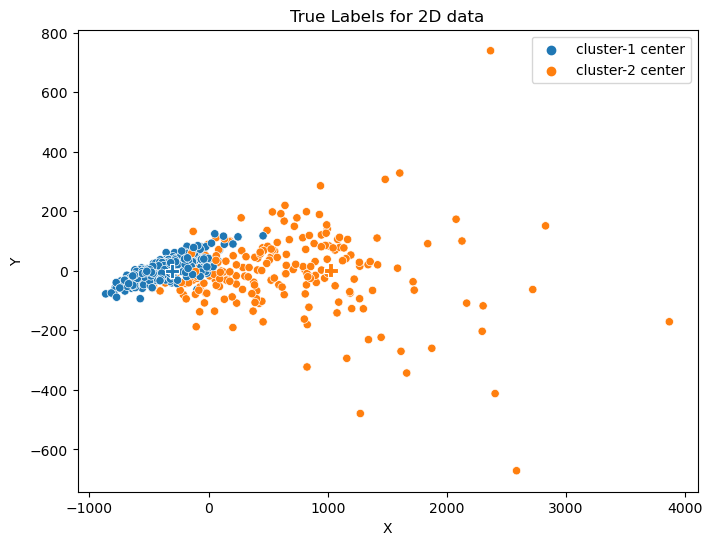

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y.to_numpy().flatten(), legend=False)
sns.scatterplot(x=initial_mu_2d[:,0], y=initial_mu_2d[:,1], hue=["cluster-1 center","cluster-2 center"], marker="P", s=100)
plt.title('True Labels for 2D data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Normalizing the data to achive better results

In [12]:
# Scaling data into [0, 1] in order to achive better result
scaler = MinMaxScaler()

normalized_X = scaler.fit_transform(X)

initial_mu = normalized_X[np.random.choice(X_reduced.shape[0], size=2, replace=False)]

km.fit(normalized_X, initial_mu)

predicts = km.predict(normalized_X)
    
print(f"Accuracy of K-means with normalized data  : {km.accuracy(y_true=y.to_numpy(), y_pred=predicts)*100:.2f}%")
print()


Accuracy of K-means with normalized data  : 92.79%



In [13]:
for n_components in range(1, X.shape[1] + 1):

    # Reducing the size of features using PCA
    pca = PCA(n_components=n_components)
    
    pca.fit(normalized_X)

    X_reduced = pca.transform(normalized_X)

    np.random.seed(42)

    initial_mu = X_reduced[np.random.choice(X_reduced.shape[0], size=2, replace=False)]

    print(f"Shape of data: {X_reduced.shape} | Shape of Initial MU: {initial_mu.shape}")

        
    km = KMeans(n_clusters=2)

    km.fit(X_reduced, initial_mu)

    predicts = km.predict(X_reduced)

    if n_components == 2:
        X_2d = X_reduced.copy()
        initial_mu_2d = initial_mu.copy()
        predicts_2d = predicts.copy()
        
    print(f"Accuracy of K-means with {n_components} of {X.shape[1]} features  : {km.accuracy(y_true=y.to_numpy(), y_pred=predicts)*100:.2f}%")
    print()

Shape of data: (569, 1) | Shape of Initial MU: (2, 1)
Accuracy of K-means with 1 of 30 features  : 92.79%

Shape of data: (569, 2) | Shape of Initial MU: (2, 2)
Accuracy of K-means with 2 of 30 features  : 92.79%

Shape of data: (569, 3) | Shape of Initial MU: (2, 3)
Accuracy of K-means with 3 of 30 features  : 92.79%

Shape of data: (569, 4) | Shape of Initial MU: (2, 4)
Accuracy of K-means with 4 of 30 features  : 92.79%

Shape of data: (569, 5) | Shape of Initial MU: (2, 5)
Accuracy of K-means with 5 of 30 features  : 92.79%

Shape of data: (569, 6) | Shape of Initial MU: (2, 6)
Accuracy of K-means with 6 of 30 features  : 92.79%

Shape of data: (569, 7) | Shape of Initial MU: (2, 7)
Accuracy of K-means with 7 of 30 features  : 92.79%

Shape of data: (569, 8) | Shape of Initial MU: (2, 8)
Accuracy of K-means with 8 of 30 features  : 92.79%

Shape of data: (569, 9) | Shape of Initial MU: (2, 9)
Accuracy of K-means with 9 of 30 features  : 92.79%

Shape of data: (569, 10) | Shape of I

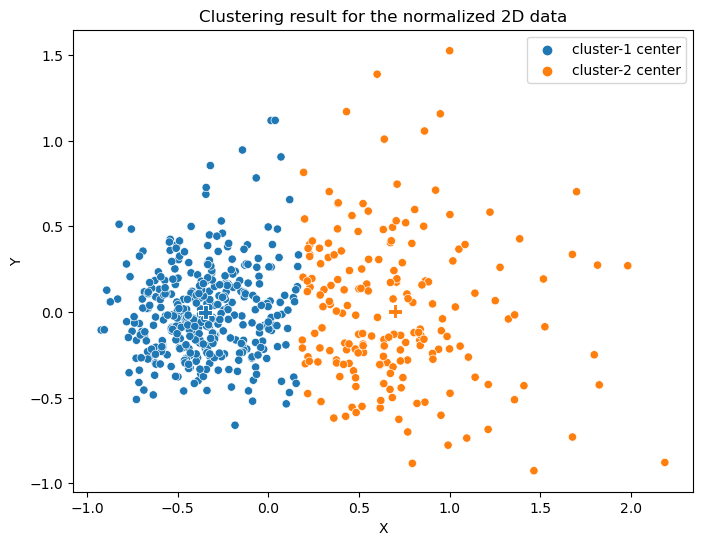

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=predicts_2d.flatten(), legend=False)
sns.scatterplot(x=initial_mu_2d[:,0], y=initial_mu_2d[:,1], hue=["cluster-1 center","cluster-2 center"], marker="P", s=100)
plt.title('Clustering result for the normalized 2D data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

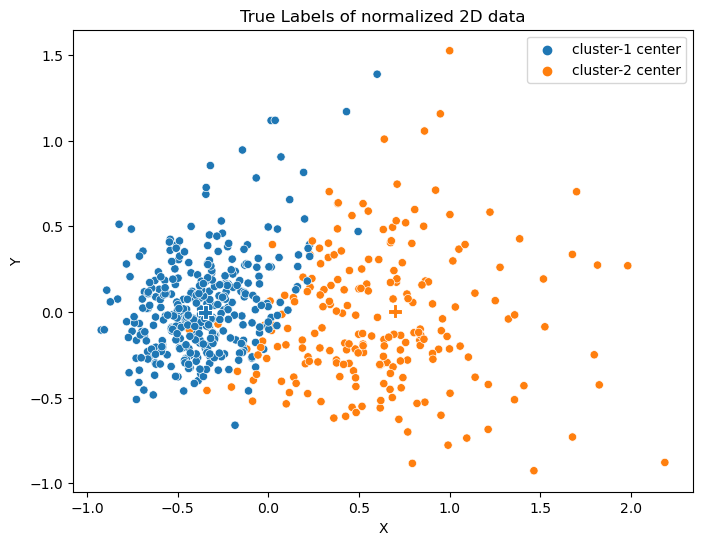

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y.to_numpy().flatten(), legend=False)
sns.scatterplot(x=initial_mu_2d[:,0], y=initial_mu_2d[:,1], hue=["cluster-1 center","cluster-2 center"], marker="P", s=100)
plt.title('True Labels of normalized 2D data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()